In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import csv
import os
from sklearn.linear_model import ElasticNet, LinearRegression, SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import nltk
import operator
import xlrd
import matplotlib.pyplot as plt
import random

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import csv
dir = '/content/drive/My Drive/Backup/Research/Incivility/Perspective/'
# Read input data
input_file_1 = dir+'Toxicity_Error_Analysis_BERT_Train_Set_1_Final.tsv'
input_file_2 = dir+'Toxicity_Error_Analysis_BERT_Train_Set_2_Final.tsv'
input_file_3 = dir+'Toxicity_Error_Analysis_BERT_Train_Set_3_Final.tsv'

comments = []
scores = []
with open(input_file_1) as f:
    # header = f.readline()
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        # dataset.append(row)
        new_row = list(filter(('').__ne__, row))[:7]
        if len(new_row) != 7:
            print(new_row[0])
            print(new_row)
        
        # print(new_row)
        comments.append(new_row[1])
        scores.append(float(new_row[6]))
        
        # if float(new_row[4]) < 0:
        #     comments.append(new_row[1])
        #     scores.append(float(new_row[4]))

with open(input_file_2) as f:
    # header = f.readline()
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        # dataset.append(row)
        new_row = list(filter(('').__ne__, row))[:7]
        if len(new_row) != 7:
            print(new_row)
        
        comments.append(new_row[1])
        scores.append(float(new_row[6]))

        # if float(new_row[4]) < 0:
        #     comments.append(new_row[1])
        #     scores.append(float(new_row[4]))

with open(input_file_3) as f:
    # header = f.readline()
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        # dataset.append(row)
        new_row = list(filter(('').__ne__, row))[:7]
        if len(new_row) != 7:
            print(new_row)
        
        comments.append(new_row[1])
        scores.append(float(new_row[6]))

        # if float(new_row[4]) < 0:
        #     comments.append(new_row[1])
        #     scores.append(float(new_row[4]))

print(len(comments))

300806


In [5]:
# Overpredictions and underpredictions
count = 0
cleaned_comments = []
cleaned_scores = []
for idx, comment in enumerate(comments):

    if idx % 100000 == 0:
        print(idx)

    if comment.count('\t') > 3:    
    #   print('\n Trying to fix **', comment, scores[idx])          
      new_lines = comment.split('\n')
      text, score = new_lines[0].split('\t')[0], new_lines[0].split('\t')[5]
    #   print('& ', text, score)
      cleaned_comments.append(text)
      cleaned_scores.append(float(score))
      
      for line in new_lines[1:-1]:
        fields = line.split('\t')
        # print('& ', fields)
        cleaned_comments.append(fields[1])
        cleaned_scores.append(float(fields[6]))
      
      text = new_lines[-1].split('\t')[1]
      cleaned_comments.append(text)
      cleaned_scores.append(scores[idx])
    #   print('& ', text, scores[idx])
      count += len(new_lines)

    else:
      count += 1
      cleaned_comments.append(comment)
      cleaned_scores.append(scores[idx])

print(count, len(cleaned_comments), len(cleaned_scores))
comments = cleaned_comments
scores = cleaned_scores

0
100000
200000
300000
300806 300806 300806


In [ ]:
print(np.mean(scores), np.std(scores))

0.026562604540051438 0.13881782307122056


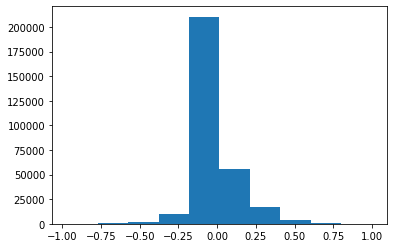

In [ ]:
import matplotlib.pyplot as plt
plt.hist(scores)

plt.show()

In [6]:
# Keep a separate validation set 20% of total 
data_comments, dev_comments, data_scores, dev_scores = train_test_split(comments, scores, test_size=0.2, random_state=2020)

In [7]:
print(len(comments), len(data_comments), len(dev_comments))

300806 240644 60162


In [ ]:
# Grid Search with 5-fold CV and fit
pipeline = Pipeline([
        #    ('vect', TfidfVectorizer()),          
           ('vect', CountVectorizer(binary=True)), # Try binary/one-hot?
           ('clf', SGDRegressor(random_state=526, penalty='elasticnet')),
])

parameters = {
    # Any more features?
    'vect__max_features': (2000, 4000, 5000),
    'clf__max_iter': (300, 500, 1000),  
    'clf__l1_ratio': (0, 0.25, 0.5, 0.75, 1),
    # 'clf__alpha': (0.0001, 0.00001, 0.000001)
}

grid_search = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error', cv=5, verbose=3)

In [ ]:
grid_search.fit(data_comments, data_scores)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.019, total=  11.7s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.019, total=  11.4s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.2s remaining:    0.0s


[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.019, total=  11.5s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.019, total=  11.4s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.019, total=  11.5s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000, score=-0.019, total=  11.5s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000, score=-0.019, total=  11.7s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000, score=-0.018, total=  11.7s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000 .....
[CV]

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 43.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=True,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prepr

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__l1_ratio': 0, 'clf__max_iter': 300, 'vect__max_features': 5000}
-0.01870382937230681


In [8]:
# Fill hyperparameters from above and create a pipeline
best_pipeline = Pipeline([
           #('vect', TfidfVectorizer(max_features=2000)),
           ('vect', CountVectorizer(binary=True, max_features=5000)),
           ('clf', SGDRegressor(alpha=0.0001, l1_ratio=0, penalty='elasticnet', max_iter=300, random_state=526)),
])

In [9]:
# Training model on full train set with pipeline of best hyperparameters
best_pipeline.fit(data_comments, data_scores)

# Testing the tuned trained model on the test set
y_train = data_scores
X_test = dev_comments
y_test = dev_scores
y_baseline_random = [random.uniform(-1, 1) for i in range(len(y_test))]
avg = np.average(y_train)
y_baseline_average = [avg for i in range(len(y_test))]

y_pred = best_pipeline.predict(X_test)

print('Mean squared error:')
print('Model: ', mean_squared_error(y_test, y_pred))
print('Random baseline: ', mean_squared_error(y_test, y_baseline_random))
print('Average baseline: ', mean_squared_error(y_test, y_baseline_average))

print('R2 score:')
print('Model: ', r2_score(y_test, y_pred))
print('Random baseline: ', r2_score(y_test, y_baseline_random))
print('Average baseline: ', r2_score(y_test, y_baseline_average))

# Saving the sample predictions
with open('Sample_Preds_280k_binary.csv', 'w') as g:
    writer = csv.writer(g)
    writer.writerow(['Text', 'Target Error', 'Predicted Error'])								
    for text, true_score, pred_score in zip(X_test, y_test, y_pred):
        writer.writerow([text, true_score, pred_score]) 


Mean squared error:
Model:  0.01813672339914438
Random baseline:  0.3515087839139299
Average baseline:  0.019169143383593164
R2 score:
Model:  0.05385514842675709
Random baseline:  -17.337282808129835
Average baseline:  -3.4693318191614253e-06


In [ ]:
cv = best_pipeline.named_steps['vect']

cv_fit = cv.transform(np.array(data_comments))
vocab_counts = cv_fit.toarray().sum(axis=0)

weights = best_pipeline.named_steps['clf'].coef_

vocab = []
for word, idx in sorted(cv.vocabulary_.items()):
    vocab.append([word, vocab_counts[idx], weights[idx]])

In [ ]:
with open('weights_300k_binary_bert_fixed_new.csv', 'w') as w:
    writer = csv.writer(w)
    for row in vocab:
        writer.writerow(row)